# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [15]:
apple = pd.read_csv("./appl_1980_2014.csv")

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [4]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [16]:
apple["Date"] = apple["Date"].astype(np.datetime64)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 6.  Set the date as the index

In [19]:
apple.set_index("Date", inplace=True) # notice here , juse use the colname not col itself like data.xxx
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [22]:
apple[apple.duplicated()] # no ?

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [26]:
apple.sort_index(axis=0, ascending=True, inplace=True) # 0 stands for col
apple.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1980-12-12,0.45,28.75,28.87,28.75,28.75,117258400
1980-12-15,0.42,27.25,27.38,27.25,27.38,43971200
1980-12-16,0.39,25.25,25.37,25.25,25.37,26432000
1980-12-17,0.40,25.87,26.00,25.87,25.87,21610400
1980-12-18,0.41,26.63,26.75,26.63,26.63,18362400


### Step 9. Get the last business day of each month

### Step 10.  What is the difference in days between the first day and the oldest

AttributeError: 'DatetimeIndex' object has no attribute 'ym'

### Step 11.  How many months in the data we have?

In [38]:
apple["Y"] = apple.index.year
apple["M"] = apple.index.month
apple.groupby(by=["Y","M"]).count().shape[0]

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

<AxesSubplot:title={'center':'Apple Stock'}, xlabel='Date', ylabel='Price'>

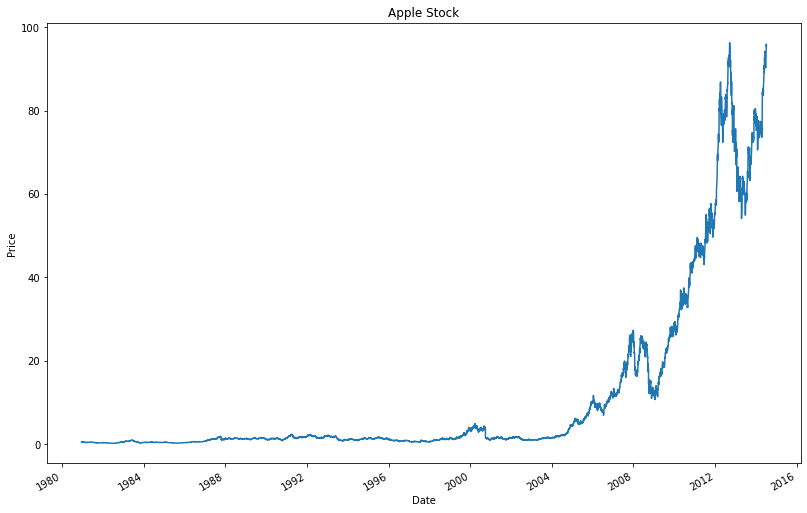

In [51]:
# via seaborn
# plt.figure(figsize=(13.5, 9))
# sns.lineplot(x=apple.index, y=apple["Adj Close"])

# # via plt
# fig, ax = plt.subplots(figsize=(13.5, 9))
# ax.plot(apple.index, apple["Adj Close"], label="Adj Close")
# ax.set_title("Apple Stock")
# ax.set_xlabel("Date")
# ax.set_ylabel("Adj Close")
# ax.legend()
# plt.show()

# seems like the most easy way. and use the index as xaxis value by default. 
apple["Adj Close"].plot(kind='line', figsize=(13.5, 9), title="Apple Stock", ylabel="Price")


### BONUS: Create your own question and answer it.